In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

C:\Users\82106\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/Electric_Vehicle_Population_Data.csv/Electric_Vehicle_Population_Data.csv')
data
data.columns == 'nan'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [3]:
# droprows = data.loc[data['Vehicle Location'] == 'nan'].index
# data = data.drop(droprows, axis = 0)
data

# data.loc[data['Vehicle Location'] != 'nan']
# data.loc[data['Vehicle Location'] == 'nan'].values

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [4]:
if (data == 'nan').values.any():
    print('The dataset contains only the value "strin"')
else:
    print('The dataset contains other values besides "strin"')

The dataset contains other values besides "strin"


In [5]:
data.Make.unique()

array(['TESLA', 'VOLVO', 'BMW', 'NISSAN', 'MERCEDES-BENZ', 'KIA',
       'CHEVROLET', 'FORD', 'MINI', 'TOYOTA', 'FIAT', 'RIVIAN', 'SUBARU',
       'AUDI', 'PORSCHE', 'JEEP', 'HYUNDAI', 'CHRYSLER', 'VOLKSWAGEN',
       'HONDA', 'SMART', 'LINCOLN', 'MITSUBISHI', 'CADILLAC', 'POLESTAR',
       'JAGUAR', 'LUCID MOTORS', 'LEXUS', 'LAND ROVER', 'GENESIS',
       'FISKER', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'TH!NK',
       'BENTLEY'], dtype=object)

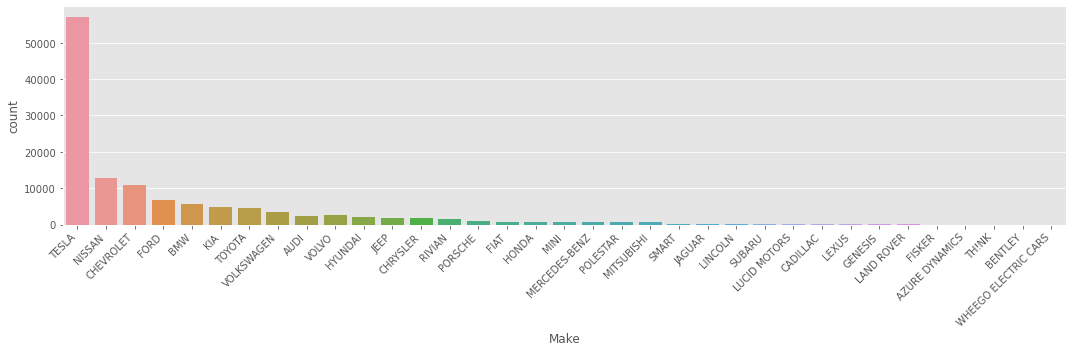

In [6]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = data, x = 'Make',  order = data.groupby('Make')['Model'].count().sort_values(ascending = False).index, orient = 'v')
plt.xticks(rotation = 45, ha = 'right')
labels = data.groupby('Make')['Model'].count().sort_values(ascending = False).values
# plt.bar_label(ax.containers[0], labels = labels)
plt.tight_layout()
plt.show()

In [7]:
data['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

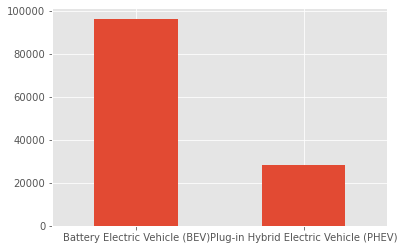

In [8]:
data['Electric Vehicle Type'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

배출가스:

BEV: 주행 중 직접적인 배출가스가 없음. 공기 질 개선에 기여.
    
PHEV: 전기 모드에서는 배출가스 없음. 그러나 내연 기관 모드에서는 배출가스 발생.

    
에너지 효율:

BEV: 전기 모터가 내연 기관보다 효율적. 전체적으로 더 적은 에너지 소비.
    
PHEV: 전기와 내연 기관의 병합으로 상대적으로 낮은 에너지 효율. 사용 패턴에 따라 차이 발생.


총괄적 환경 영향:

BEV: 전기 생산 방법과 배터리 제조 과정의 환경 영향이 주요 요소. 그러나 전반적으로는 가장 환경 친화적인 선택.

PHEV: 내연 기관 사용으로 인한 배출가스와 에너지 효율 문제가 있지만, 전기와 가솔린을 병행하여 사용하는 유연성 제공.

In [9]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

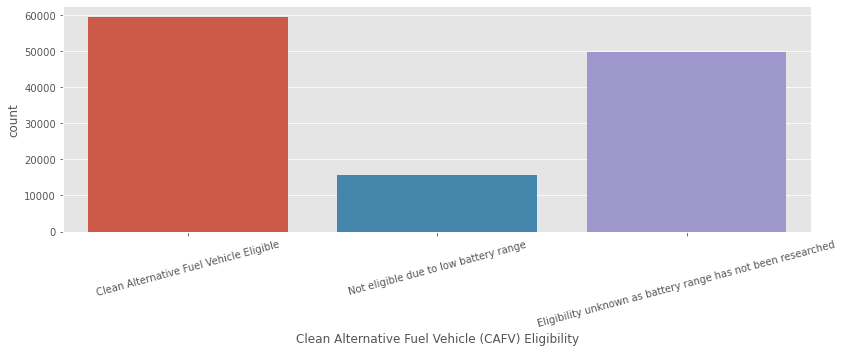

In [10]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = data, x = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.xticks(rotation = 15, ha = 'center')
plt.tight_layout()
plt.show()

Clean Alternative Fuel Vehicle Eligible (청정 대체 연료 차량 자격 적합) -> Count 60000

이 상태는 차량이 정부 또는 기타 기관에서 제공하는 청정 대체 연료 차량 인센티브나 보조금 프로그램의 기준을 충족함을 나타냅니다.

Not eligible due to low battery range (낮은 배터리 주행 범위로 인해 자격 미달) -> Count 15000

이 상태는 차량이 인센티브 프로그램의 기준을 충족시키기에 충분한 배터리 주행 범위를 갖추지 못했음을 의미합니다.

Eligibility unknown as battery range has not been researched (배터리 주행 범위 연구가 이루어지지 않아 자격 불명) -> Count 50000

이 상태는 차량의 배터리 주행 범위에 대한 정보가 부족하거나 연구되지 않아 인센티브 자격 여부를 결정할 수 없음을 나타냅니다.

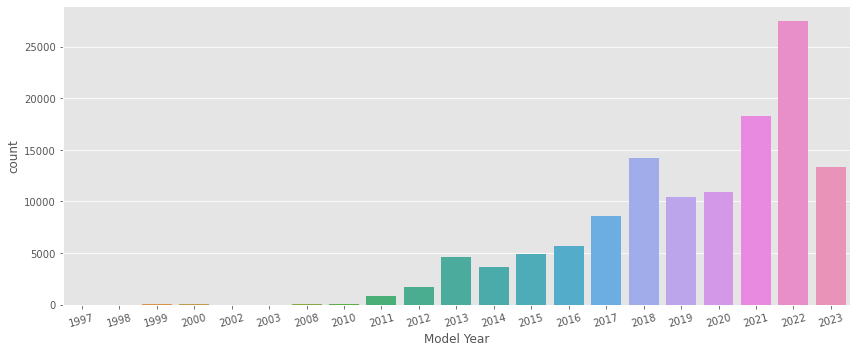

In [11]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = data, x = 'Model Year')
plt.xticks(rotation = 15, ha = 'center')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Electric Range', ylabel='Count'>

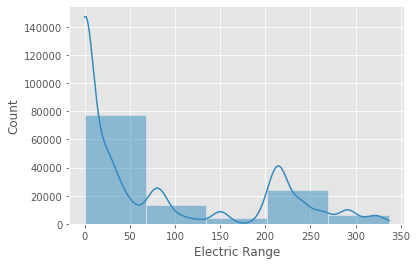

In [12]:
sns.histplot(data = data, x = 'Electric Range', bins = 5, kde = True)

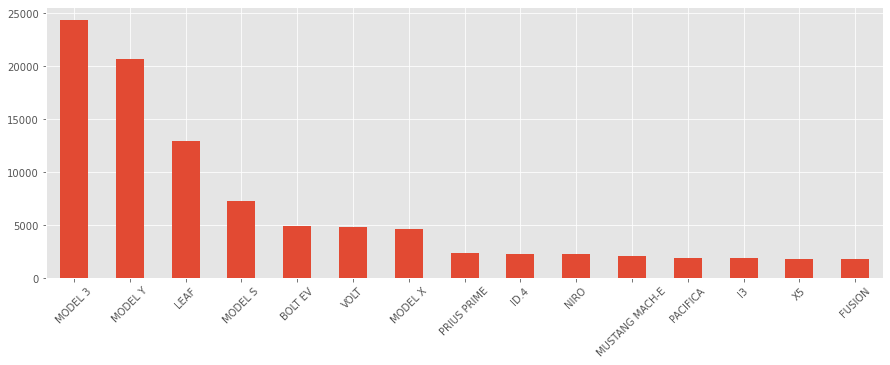

In [13]:
plt.figure(figsize = (15, 5))
data.Model.value_counts().head(15).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

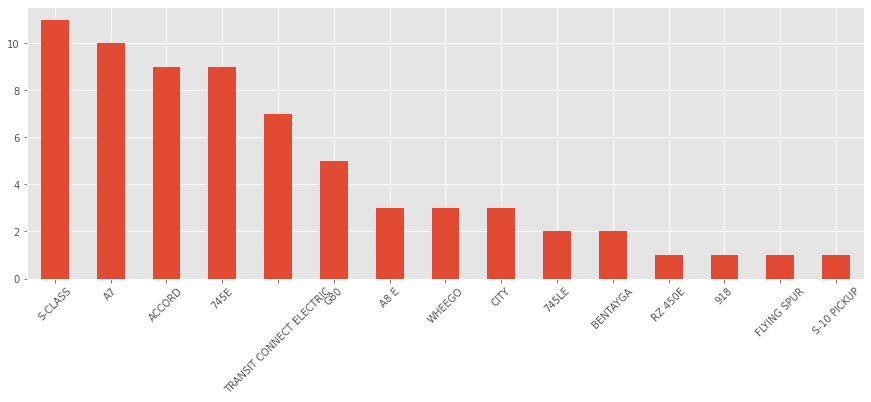

In [14]:
plt.figure(figsize = (15, 5))
data.Model.value_counts().tail(15).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

In [15]:
data['Base MSRP'].unique()

array([     0,  31950,  69900,  52900,  33950,  64950,  54950,  75095,
        32250,  81100,  53400,  39995,  44100,  36800,  36900,  98950,
        45600,  55700,  34995,  59900,  43700, 110950, 102000,  52650,
       184400,  90700,  89100,  91250, 109000,  32995, 845000],
      dtype=int64)

In [16]:
data.loc[data.Model == 'MODEL X']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
20,5YJXCBE2XH,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,131584841,POINT (-122.80277 46.99409),PUGET SOUND ENERGY INC,5.306701e+10
69,5YJXCDE21K,Snohomish,Marysville,WA,98271.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,38.0,254402249,POINT (-122.19388 48.15353),NaN,5.306194e+10
105,5YJXCBE45G,Snohomish,Bothell,WA,98021.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,1.0,232691273,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
113,5YJXCBE24K,King,Seattle,WA,98112.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,43.0,141213817,POINT (-122.30716 47.62687),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124596,5YJXCAE21M,Island,Camano Island,WA,98282.0,2021,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,10.0,131497747,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10
124610,7SAXCBE52N,King,Maple Valley,WA,98038.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,214982498,POINT (-122.04526 47.39394),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
124611,5YJXCAE29L,Snohomish,Stanwood,WA,98292.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,9324381,POINT (-122.37265 48.24159),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
124646,5YJXCBE29H,King,Seattle,WA,98109.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,36.0,127359683,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [17]:
droprows = data.loc[data['Vehicle Location'] == 'nan'].index
data = data.drop(droprows, axis = 0)
data
data.loc[data['Vehicle Location'] == 'nan'].index

Int64Index([], dtype='int64')

In [18]:
type(data['Vehicle Location'])

pandas.core.series.Series